# TITLE : MODELS OF VISCOSITY FROM COMPOSITIONAL DATA MWC7+  TEMP PRESSURE USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF VISCOSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE AUTOMATICALLY FIT MODELS AND STORE MODELS AT GIVEN PATH 

IF REVIEWER WANT TO CHECK SIMILLAR MODELS USED TO PREDICT TEST OR NOT WHICH TRAINED HERE THAN IN MODEL VALIDATION FILE OPTIMIZED PARAMETER CAN BE CKECKED WHICH AVOID RETRAINING WHICH TAKE A LOT TIME AS WELL AS TO CHECK DATA TRAIN AND TEST ALREADY SEPRATED AND STAROED INTO DATASOURCE FROM PREPROCESSING FILE SAME DATA USED HERE WHICH VERIFIED BY CHEKING EXCEL FILES 


ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, XGB , ANN

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error


#Model saving
import pickle


<ipython-input-1-1ef187d9cf9b>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\DATASOURCE\\"
file_name = "TRAIN.csv"
model_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\MODELS\\"

export_data_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\ABOVE BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\FIGURES\\"

train = pd.read_csv(path+file_name)

In [3]:
train.head()

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
0,0.0116,0.0025,0.0219,0.16330,0.062900,0.074800,0.06090,0.04360,0.0358,0.52270,249.000000,374.800000,137.90000,0.963000
1,0.0000,0.0065,0.0086,0.18062,0.059914,0.088596,0.06392,0.04069,0.0259,0.52525,122.575433,323.200000,439.20458,1.660428
2,0.0000,0.0041,0.0044,0.40480,0.077400,0.082000,0.05450,0.03640,0.0283,0.31415,210.463982,370.950000,325.70000,0.340000
3,0.0000,0.0021,0.0034,0.20040,0.079300,0.080000,0.06600,0.05870,0.0508,0.45930,230.000000,385.900000,137.90000,0.903000
4,0.0000,0.0019,0.0251,0.31890,0.075100,0.065900,0.04770,0.03510,0.0329,0.39740,324.000000,365.372222,124.14966,3.390000


In [4]:
X_train = train.drop("VISCOSITY",axis = 1)
y_train = train.VISCOSITY

                              #### Scalling Dataset ####

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [6]:
#following model path follows for all models location
scaler_file = 'scaler.sav'
pickle.dump(scaler , open(model_path+scaler_file , "wb") )

##### .......................................................................................SectionBreak.......................................................................................

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [7]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [8]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

,FEATURES,VIF
0,H2S,28.894730
1,N2,11.904725
2,CO2,267.575234
3,C1,4524.728757
4,C2,457.926459
5,C3,1249.429697
6,C4,411.514906
7,C5,83.588844
8,C6,92.030048
9,C7+,7395.117043


In [9]:
VIF_DataFrame.to_excel(export_data_path+"VIF.xlsx")

                              #### Model Fitting for linear regression ####

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

                         #### Model Summary #### 

In [11]:
x_train_linear_summary = sm.add_constant(x_train, prepend=False)
y_train_linear_summary = y_train

In [12]:
linear_summary = sm.OLS(y_train_linear_summary ,  x_train_linear_summary).fit()

In [13]:
linear_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VISCOSITY   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     22.60
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.40e-31
Time:                        18:00:01   Log-Likelihood:                -95.944
No. Observations:                 198   AIC:                             219.9
Df Residuals:                     184   BIC:                             265.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3446      0.156     -2.214      0.028      -0.652      -0.037
x2            -0.1113      0.100     -1.114      0.267      -0.308       0.086
x3            -0.5449      0.474     -1.150      0.251      -1.480       0.390
x4            -2.5141      1.948     -1.291      0.198      -6.357       1.329
x5            -0.5256      0.620     -0.848      0.398      -1.748       0.697
x6            -1.0467      1.024     -1.022      0.308      -3.066       0.973
x7            -1.1221      0.587     -1.910      0.058      -2.281       0.037
x8            -0.2645      0.265     -0.999      0.319      -0.787       0.258
x9            -0.4099      0.278     -1.475      0.142      -0.958       0.138
x10           -2.7692      2.490     -1.112      0.268      -7.683       2.144
x11            0.1597      0.044      3.599      0.000       0.072       0.247
x12           -0.2602      0.036     -7.226      0.000      -0.331      -0.189
x13            0.0496      0.037      1.357      0.176      -0.023       0.122
const          0.8499      0.029     29.346      0.000       0.793       0.907
==============================================================================
Omnibus:                       46.773   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.458
Skew:                           0.898   Prob(JB):                     5.28e-36
Kurtosis:                       7.058   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                    #### Model Saving ####

In [14]:
linear_file = 'linear_model.sav'
pickle.dump(linear_regression , open(model_path+linear_file , "wb") )

## 2. SVR MODEL

                              #### Model tuning for svr Regression ####

In [15]:
svr_model = SVR()

In [16]:
svr_para = {'C':np.arange(50,5000,50),'gamma':np.arange(0.01,0.5,0.01)}
svr_grid = GridSearchCV(svr_model,svr_para, cv = 5 , verbose=3, n_jobs=-1)

In [17]:
svr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 4851 candidates, totalling 24255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 5648 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 12816 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 22032 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 24255 out of 24255 | elapsed:   22.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150, 1200, 1250, 1300, 1350, 1400, 1...
       4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950]),
                         'gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49])},
       

In [18]:
svr_grid.best_params_

{'C': 50, 'gamma': 0.060000000000000005}

In [19]:
svr_best_para = svr_grid.best_params_

In [20]:
svr_regression = SVR( C = svr_best_para["C"],
                      gamma = svr_best_para["gamma"])
svr_regression.fit(x_train,y_train)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.060000000000000005, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

                                          #### Model saveing #### 

In [21]:
svr_file = 'svr_model.sav'
pickle.dump(svr_regression , open(model_path+svr_file , "wb") )

## 3. Decision Tree Model 

                                          #### Model tuning #### 

In [22]:
dt_model = DecisionTreeRegressor()

In [23]:
dt_para = {
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,7,1),
    'min_samples_split': range(2,7,1),
    'splitter' : ['best', 'random']
    }

In [24]:
dt_grid = GridSearchCV(estimator=dt_model,
                     param_grid=dt_para,
                     cv=5,
                     n_jobs =-1,
                     verbose=3)
dt_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 17672 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:   11.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 7),
                  

In [25]:
dt_grid.best_params_

{'criterion': 'mae',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [26]:
dt_best_para = dt_grid.best_params_

In [27]:
dt_regression = DecisionTreeRegressor(criterion = dt_best_para["criterion"],
                                      max_depth = dt_best_para["max_depth"],
                                      min_samples_leaf = dt_best_para["min_samples_leaf"],
                                      min_samples_split = dt_best_para["min_samples_split"],
                                      splitter = dt_best_para["splitter"],
                                      random_state = 0
                                      )

dt_regression.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='random')

                                          #### Model saveing #### 

In [28]:
#model_path = 'C:\\STUDY DRIVE\\Mtech New\\DENSITY PREDICTION\\MODELS\\SATURATION PRESSURE PREDICTION SATURATION DATASET 2 PART 4 MODELS\\'
dt_file = 'dt_model.sav'
pickle.dump(dt_regression , open(model_path+dt_file , "wb") )

## 4. Random forest Model 

                                          #### Model parameter tuning #### 

In [29]:
rf_model = RandomForestRegressor()

In [30]:
rf_para = {
    "n_estimators" : range(90,150,5),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

rf_grid = GridSearchCV(estimator=rf_model,
                           param_grid=rf_para,
                           cv=5,
                           n_jobs =-1,
                           verbose = 3)

In [31]:
rf_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed:  4.8m

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
rf_grid.best_params_

{'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 115}

In [33]:
rf_best_para = rf_grid.best_params_

                                          #### Model fiting with tuning #### 

In [34]:
rf_regression = RandomForestRegressor(n_estimators = rf_best_para["n_estimators"],
                                      max_depth = rf_best_para["max_depth"],
                                      min_samples_leaf =rf_best_para["min_samples_leaf"],
                                      min_samples_split = rf_best_para["min_samples_split"],
                                      max_features = rf_best_para["max_features"],
                                      random_state = 0
                                      )

rf_regression.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=115, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

                                          #### Model Saving #### 

In [35]:
rf_file = 'rf_model.sav'
pickle.dump(rf_regression , open(model_path+rf_file , "wb") )

## 5. KNN Model

In [36]:
knn_model = KNeighborsRegressor()

In [37]:
knn_para = {"n_neighbors"  : range(2,11)}
knn_grid = GridSearchCV(knn_model,knn_para, verbose=3, n_jobs=-1)

In [38]:
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(2, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [39]:
knn_grid.best_params_

{'n_neighbors': 3}

In [40]:
knn_best_para = knn_grid.best_params_

In [41]:
knn_regression = KNeighborsRegressor( n_neighbors = knn_best_para["n_neighbors"])

knn_regression.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

                                          #### Model Saving #### 

In [42]:
knn_file = 'knn_model.sav'
pickle.dump(knn_regression , open(model_path+knn_file , "wb") )

## 6. XGB Model

In [43]:
xgb_model = XGBRegressor()

In [44]:
xgb_para={
   
    'learning_rate': np.arange(0.1,0.2,0.04),
    'max_depth': range(2,10,1),
    'n_estimators':range(90,150,10),
    "gamma" : np.arange(0.1,0.5,0.3),
    "min_child_weight": range(1,10,2)
}

In [45]:
xgb_grid = GridSearchCV(xgb_model,xgb_para, cv = 5 , verbose=3, n_jobs=-1)

In [46]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [47]:
xgb_grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.18000000000000002,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 90}

In [48]:
xgb_best_para = xgb_grid.best_params_

In [49]:
xgb_regression = XGBRegressor(
                    learning_rate = xgb_best_para["learning_rate"],
                    max_depth = xgb_best_para["max_depth"],
                    n_estimators = xgb_best_para["n_estimators"],
                    gamma = xgb_best_para["gamma"],
                    min_child_weight = xgb_best_para["min_child_weight"]
                    )
xgb_regression.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.18000000000000002, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
xgb_file = 'xgb_model.sav'
pickle.dump(xgb_regression , open(model_path+xgb_file , "wb") )

## 7. ANN Model

In [68]:
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.Input(shape=x_train.shape[1]))
    
    for i in range(hp.Int('layers', 2, 15)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=3,
                                            max_value=15,
                                            step=1),
                               activation=hp.Choice('act_' + str(i),["relu","tanh"])))
        
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [69]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=50,
    executions_per_trial=3,
    project_name = "ANN")

In [70]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

In [72]:
tuner.search(x_train, y_train.values,
             epochs=100,
             validation_split = 0.20,
             callbacks=[early_stop])

Trial 50 Complete [00h 00m 14s]
val_mean_squared_error: 0.8031985759735107

Best val_mean_squared_error So Far: 0.06453858191768329
Total elapsed time: 00h 09m 10s
INFO:tensorflow:Oracle triggered exit


In [73]:
tuner.results_summary()

Results summary
Results in .\ANN
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
layers: 3
units_0: 14
act_0: tanh
units_1: 12
act_1: tanh
learning_rate: 0.01
units_2: 6
act_2: tanh
units_3: 6
act_3: tanh
units_4: 14
act_4: tanh
units_5: 12
act_5: tanh
units_6: 13
act_6: tanh
units_7: 8
act_7: relu
units_8: 14
act_8: tanh
units_9: 10
act_9: tanh
units_10: 12
act_10: tanh
units_11: 9
act_11: tanh
units_12: 12
act_12: tanh
units_13: 6
act_13: tanh
Score: 0.06453858191768329
Trial summary
Hyperparameters:
layers: 3
units_0: 9
act_0: tanh
units_1: 12
act_1: relu
learning_rate: 0.01
units_2: 6
act_2: tanh
units_3: 14
act_3: tanh
units_4: 11
act_4: tanh
units_5: 10
act_5: tanh
units_6: 11
act_6: tanh
units_7: 6
act_7: tanh
units_8: 10
act_8: relu
units_9: 7
act_9: tanh
units_10: 11
act_10: tanh
units_11: 12
act_11: relu
units_12: 11
act_12: relu
units_13: 4
act_13: relu
units_14: 11
act_14: relu
Score: 0.06804902354876201
Trial 

In [74]:
'''This link has proved that while showing summary of result number of unit shows higher than 
    actual number of layers which reported as bug in official keras documents.
    However it has been proven that finalized model description can be obtained by following.
    Use number of layer shown as number_layer arguments [i.g best model with number_layer = 4
    units_0 to units_3 in our case. Avoid higher values.]
    
    https://github.com/keras-team/keras-tuner/issues/66#issuecomment-525923517'''
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [75]:
ann_best_para = tuner.get_best_hyperparameters()[0].values

In [76]:
ann_regression = Sequential()


#Input layer 
ann_regression.add(tf.keras.Input(shape=x_train.shape[1]))

limit = ann_best_para["layers"] 

#Number of hidden layer
for i in range(0, limit) :
    ann_regression.add(Dense(units=ann_best_para['units_'+str(i)],activation=ann_best_para['act_'+str(i)]))

    
#Last Output Layer
ann_regression.add(Dense(units=1,activation='linear'))



#ANN compilation with loss function and optimization
ann_regression.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=ann_best_para['learning_rate']))

In [77]:
early_stop_final = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)

In [78]:
ann_regression.fit(x=x_train, 
          y=y_train, 
          epochs=1000,
          validation_split=0.20, 
          verbose=1,
          callbacks=[early_stop_final],
          )

Epoch 1/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.7875 - val_loss: 0.6897
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.3600 - val_loss: 0.4651
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2199 - val_loss: 0.4660
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2078 - val_loss: 0.4195
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1811 - val_loss: 0.3125
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1409 - val_loss: 0.2413
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1315 - val_loss: 0.2204
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1237 - val_loss: 0.2041
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1139 - val_loss: 0.1921
Epoch 10/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 0.1868
Epoch 11/1000
5/5 

Epoch 84/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0784
Epoch 85/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0140 - val_loss: 0.0800
Epoch 86/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0714
Epoch 87/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0740
Epoch 88/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0861
Epoch 89/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.0726
Epoch 90/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0896
Epoch 91/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0765
Epoch 92/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.0757
Epoch 93/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.0771
Epoch 94/1

In [79]:
pd.DataFrame(ann_regression.history.history)

,loss,val_loss
0,0.787482,0.689652
1,0.359967,0.465093
2,0.219898,0.466046
3,0.207794,0.419460
4,0.181105,0.312533
...,...,...
132,0.012007,0.080036
133,0.008320,0.069640
134,0.008817,0.079509
135,0.006482,0.067957


<AxesSubplot:>

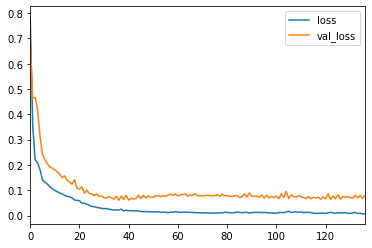

In [80]:
ann_regression_df = pd.DataFrame(ann_regression.history.history)
ann_regression_df[["loss","val_loss"]].plot()

In [81]:
ann_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                196       
                                                                 
 dense_5 (Dense)             (None, 12)                180       
                                                                 
 dense_6 (Dense)             (None, 6)                 78        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [82]:
ann_regression.evaluate(x_train,y_train)

7/7 [==============================] - 0s 998us/step - loss: 0.0222


0.0221736840903759

In [83]:
ann_regression_df.to_csv(export_data_path+"LOSS_VALUES.csv")

In [84]:
ann_file = 'ann_model.h5'
ann_regression.save(model_path+ann_file)


.......................................THE END..........................................................